In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels import formula
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf

In [2]:
df = pd.read_csv('50_Startups.csv')
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [3]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
df.corr()

/var/folders/k4/zgzvg98s73zgn3vhrcp2bhz80000gp/T/ipykernel_1088/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


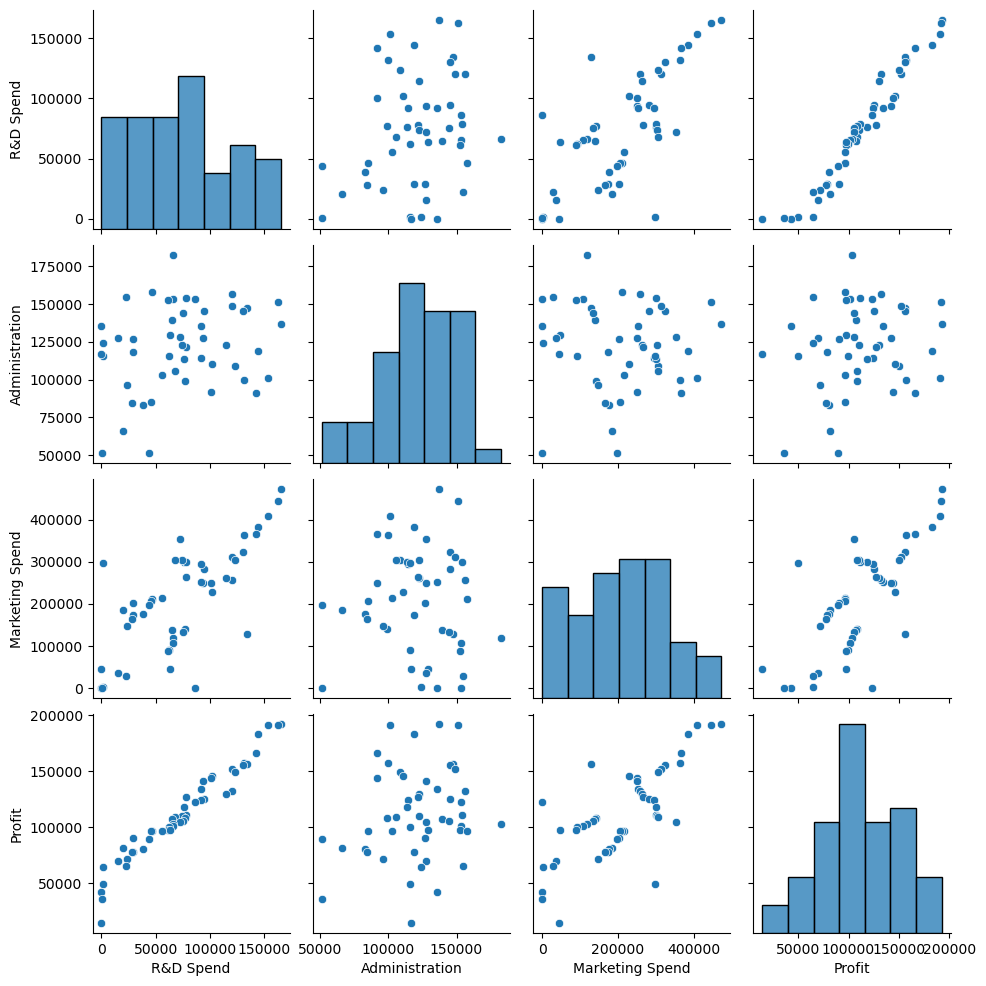

In [6]:
sns.pairplot(df)

/var/folders/k4/zgzvg98s73zgn3vhrcp2bhz80000gp/T/ipykernel_1088/1662588344.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Profit'])


<Axes: xlabel='Profit', ylabel='Density'>

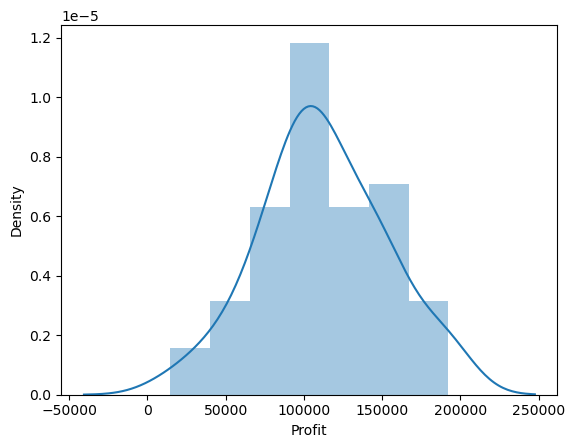

In [7]:
sns.distplot(df['Profit'])

In [8]:
df=df.rename({'R&D Spend':'RD_Spend','Marketing Spend':'Marketing_spend'},axis=1)
df

,RD_Spend,Administration,Marketing_spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [9]:
df.drop('State',axis=1,inplace=True)
df

,RD_Spend,Administration,Marketing_spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


In [10]:
model = smf.ols('Profit~RD_Spend+Administration+Marketing_spend+Profit',data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.098e+31
Date:                Thu, 06 Jul 2023   Prob (F-statistic):               0.00
Time:                        07:47:39   Log-Likelihood:                 1125.7
No. Observations:                  50   AIC:                            -2241.
Df Residuals:                      45   BIC:                            -2232.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        3.638e-11   4.56e-11      0.798      0.429   -5.55e-11    1.28e-10
RD_Spend        -5.274e-16   5.86e-16     -0.900      0.373   -1.71e-15    6.53e-16
Administration   1.665e-16   2.36e-16      0.706      0.484   -3.09e-16    6.42e-16
Marketing_spend  3.938e-16   7.81e-17      5.042      0.000    2.36e-16    5.51e-16
Profit              1.0000    6.8e-16   1.47e+15      0.000       1.000       1.000
==============================================================================
Omnibus:                        5.527   Durbin-Watson:                   1.223
Prob(Omnibus):                  0.063   Jarque-Bera (JB):                6.655
Skew:                          -0.244   Prob(JB):                       0.0359
Kurtosis:                       4.719   Cond. No.                     2.29e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.29e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:
model.params

Intercept          3.637979e-11
RD_Spend          -5.273559e-16
Administration     1.665335e-16
Marketing_spend    3.937822e-16
Profit             1.000000e+00
dtype: float64

In [12]:
print(model.tvalues,'\n',model.pvalues)

Intercept          7.976033e-01
RD_Spend          -8.997548e-01
Administration     7.055115e-01
Marketing_spend    5.042135e+00
Profit             1.470606e+15
dtype: float64 
 Intercept          0.429290
RD_Spend           0.373041
Administration     0.484128
Marketing_spend    0.000008
Profit             0.000000
dtype: float64


In [13]:
model.rsquared,model.rsquared_adj

(1.0, 1.0)

In [14]:
md= smf.ols('Profit~RD_Spend',data=df).fit()
print(md.tvalues,'\n',md.pvalues)

Intercept    19.320288
RD_Spend     29.151139
dtype: float64 
 Intercept    2.782697e-24
RD_Spend     3.500322e-32
dtype: float64


In [15]:
md= smf.ols('Profit~Administration',data=df).fit()
print(md.tvalues,'\n',md.pvalues)

Intercept         3.040044
Administration    1.419493
dtype: float64 
 Intercept         0.003824
Administration    0.162217
dtype: float64


In [16]:
md= smf.ols('Profit~RD_Spend+Administration',data=df).fit()
md.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     426.8
Date:                Thu, 06 Jul 2023   Prob (F-statistic):           7.29e-31
Time:                        07:47:40   Log-Likelihood:                -526.83
No. Observations:                  50   AIC:                             1060.
Df Residuals:                      47   BIC:                             1065.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.489e+04   6016.718      9.122      0.000    4.28e+04     6.7e+04
RD_Spend           0.8621      0.030     28.589      0.000       0.801       0.923
Administration    -0.0530      0.049     -1.073      0.289      -0.152       0.046
==============================================================================
Omnibus:                       14.678   Durbin-Watson:                   1.189
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               20.449
Skew:                          -0.961   Prob(JB):                     3.63e-05
Kurtosis:                       5.474   Cond. No.                     6.65e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
rsq_RD = smf.ols("RD_Spend~Marketing_spend+Administration",data=df).fit().rsquared
vif_RD = 1/(1-rsq_RD) 
rsq_A = smf.ols("Administration~RD_Spend+Marketing_spend",data=df).fit().rsquared  
vif_A= 1/(1-rsq_A) 
rsq_M= smf.ols("Marketing_spend~Administration+RD_Spend",data=df).fit().rsquared  
vif_M = 1/(1-rsq_M) 
d1={'Variables':['Administration','RD_Spend','Marketing_spend'],'VIF':[vif_A,vif_RD,vif_M]}
vif_frame = pd.DataFrame(d1)
vif_frame

,Variables,VIF
0,Administration,1.175091
1,RD_Spend,2.468903
2,Marketing_spend,2.326773


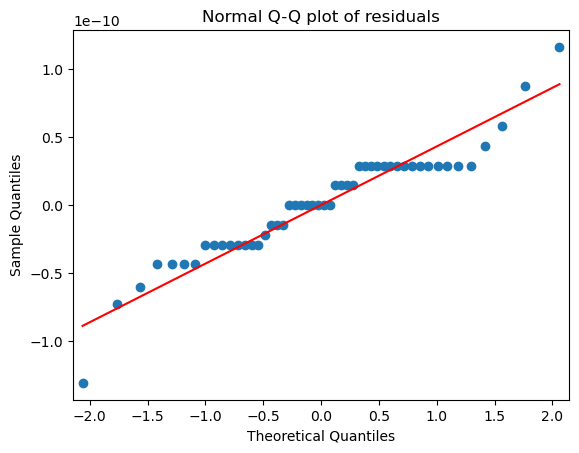

In [18]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q')
plt.title('Normal Q-Q plot of residuals')
plt.show()

In [19]:
def get_standardized_values(vals):
    return(vals-vals.mean()/vals.std())

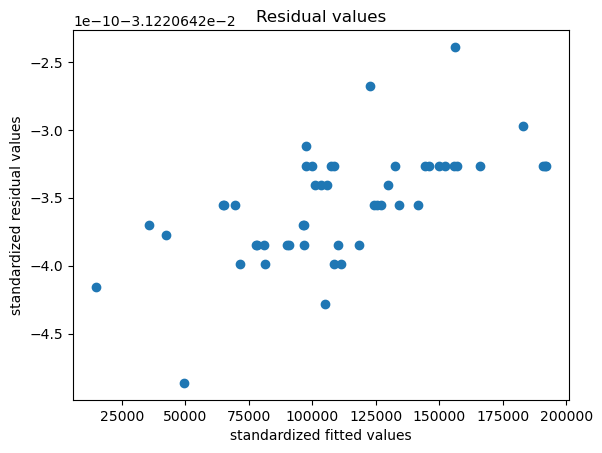

In [20]:
plt.scatter(get_standardized_values(model.fittedvalues),get_standardized_values(model.resid))
plt.title('Residual values')
plt.xlabel('standardized fitted values')
plt.ylabel('standardized residual values')
plt.show()

eval_env: 1


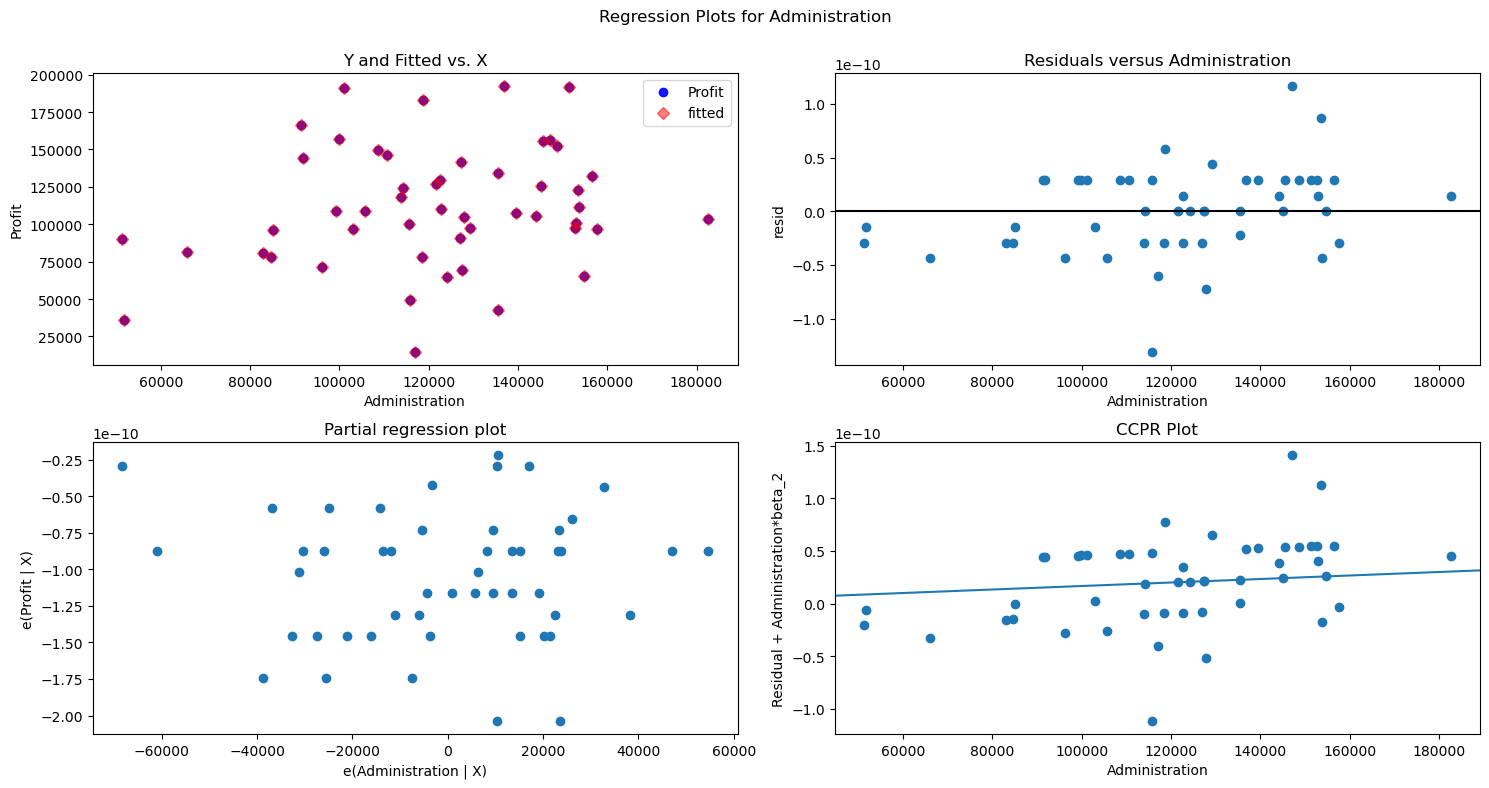

In [21]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model, 'Administration',fig=fig)
plt.show()

eval_env: 1


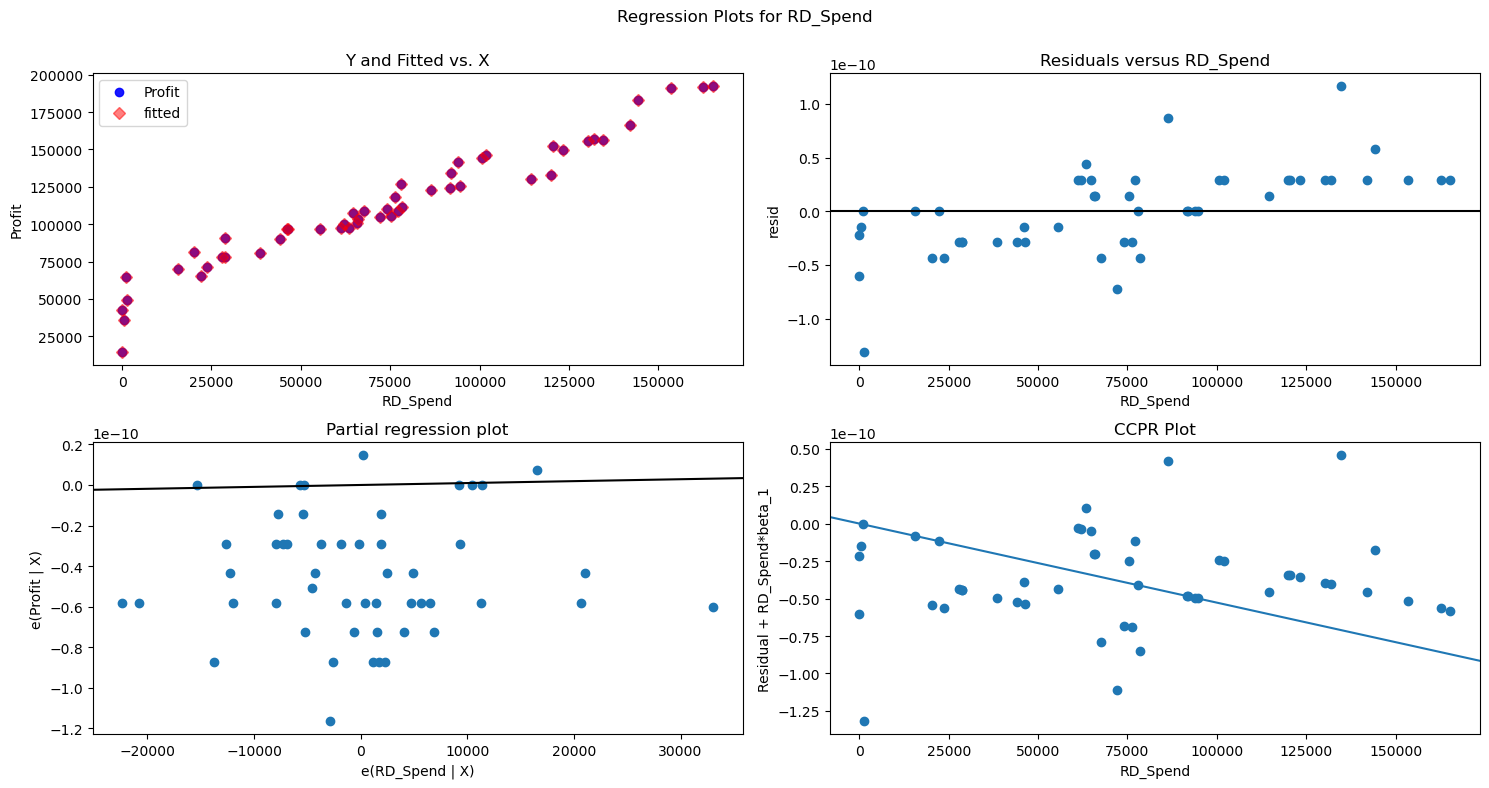

In [22]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,'RD_Spend',fig=fig)
plt.show()

eval_env: 1


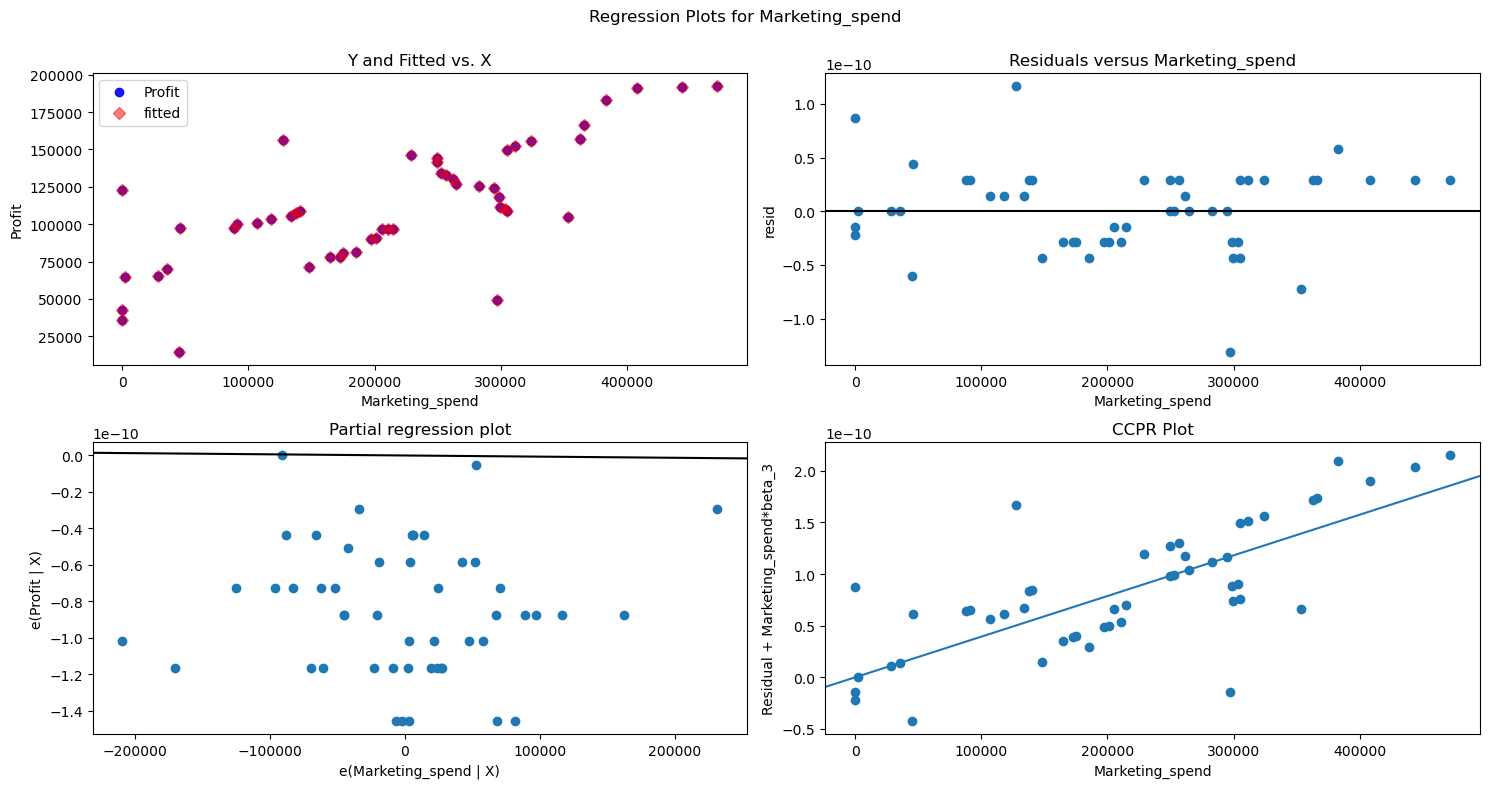

In [23]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,'Marketing_spend',fig=fig)
plt.show()

In [24]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance
c

array([1.52372144e-02, 1.53052101e-02, 1.61267958e-02, 4.41400944e-02,
       1.43837216e-02, 1.00534762e-02, 3.78086580e-01, 6.79041456e-03,
       5.83578419e-03, 6.70227061e-03, 7.64935829e-03, 9.34284680e-03,
       0.00000000e+00, 0.00000000e+00, 1.71928005e-02, 3.17182052e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.53405851e-01,
       4.11950014e-03, 2.46375824e-02, 5.45512039e-03, 1.25173095e-02,
       7.67381252e-03, 4.32624936e-03, 1.32113726e-03, 8.75995361e-02,
       4.00884187e-03, 1.61125705e-03, 5.67008919e-03, 7.08056091e-03,
       2.07031977e-02, 7.99365197e-04, 1.35264404e-02, 1.76974608e-03,
       1.59942495e-02, 1.92144869e-02, 4.25285060e-02, 6.85629354e-03,
       5.36569581e-03, 7.29204387e-03, 1.27036467e-02, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 8.52058231e-01, 6.50203274e-03,
       1.14210955e-02, 3.52618677e-01])

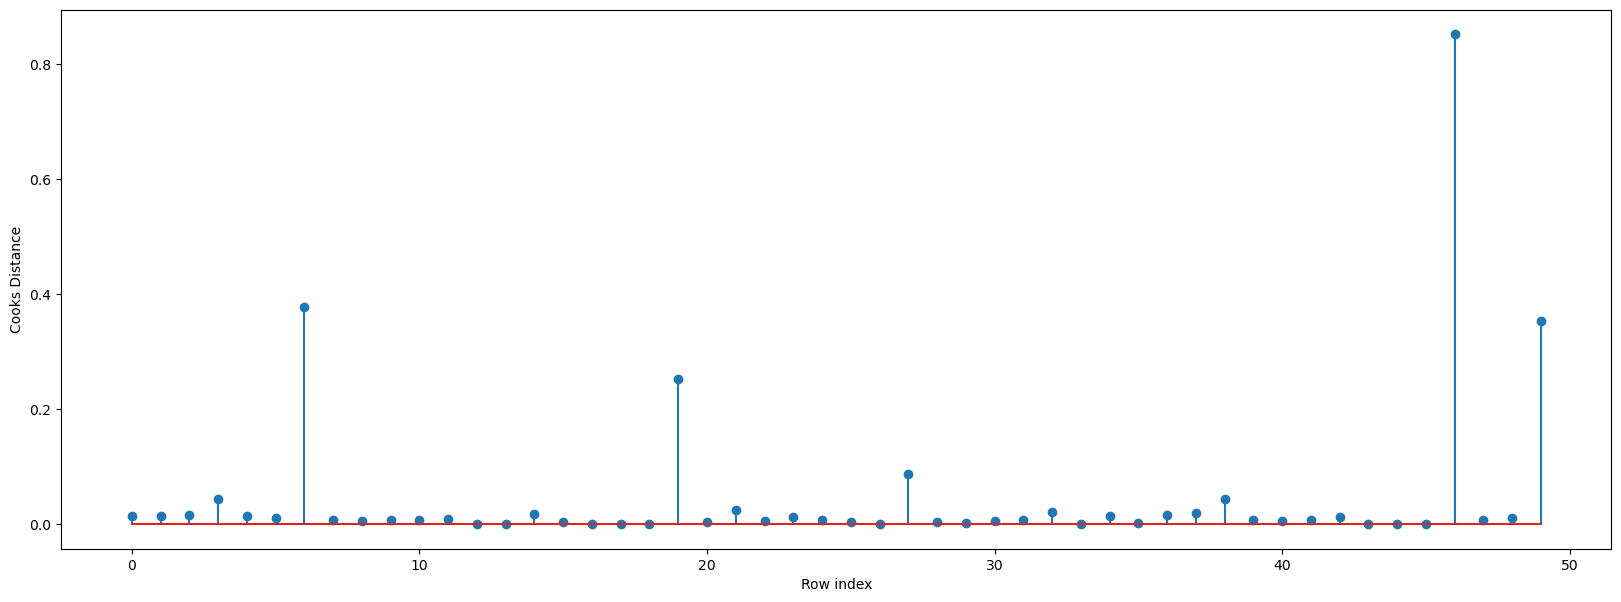

In [25]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(df)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [26]:
(np.argmax(c),np.max(c))

(46, 0.852058230790797)

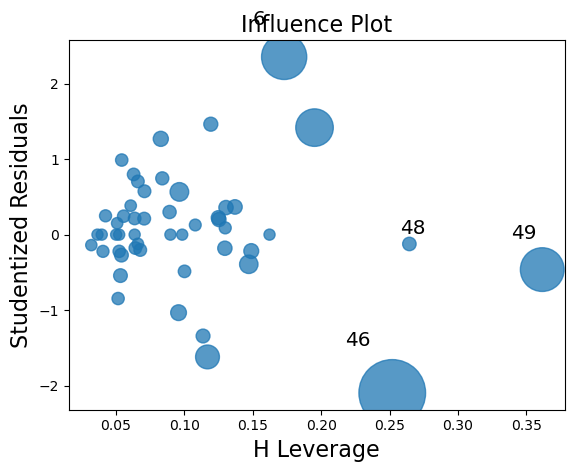

In [27]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [28]:
k = df.shape[1]
n = df.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.30000000000000004

In [29]:
df[df.index.isin([47, 49])]

,RD_Spend,Administration,Marketing_spend,Profit
47,0.0,135426.92,0.00,42559.73
49,0.0,116983.80,45173.06,14681.40


In [30]:
df_new=df.drop(df.index[[47,49]],axis=0).reset_index()

In [31]:
df_new=df_new.drop(['index'],axis=1)


In [32]:
df_new

,RD_Spend,Administration,Marketing_spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


In [34]:
final_Newdf= smf.ols('Profit~Administration+Marketing_spend',data =df_new).fit()

In [35]:
(final_Newdf.rsquared,final_Newdf.aic)

(0.579904897269647, 1109.6575232827427)

In [36]:
final_Newdf= smf.ols('Profit~RD_Spend+Marketing_spend',data =df_new).fit()

In [37]:
(final_Newdf.rsquared,final_Newdf.aic)

(0.9588424786144887, 998.1499506151225)

In [38]:
new_df=pd.DataFrame({'Adiministration':100,'RD_Spend':150,'Marketing_spend':200},index=[1])
new_df

,Adiministration,RD_Spend,Marketing_spend
1,100,150,200


In [39]:
final_Newdf.predict(new_df)

1    50644.293843
dtype: float64